## Chapter 1: Introduction

In [13]:
# necessary libraries needed for the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
# Replace 'YOUR_API_KEY' with your Alpha Vantage API Key
import requests
API_KEY = "DEA6BKBAUKJDVJ35"
BASE_URL = "https://www.alphavantage.co/query"

# Function to fetch Forex data
def get_forex_data(from_currency="EUR", to_currency="USD"):
    params = {
        "function": "FX_DAILY",
        "from_symbol": from_currency,
        "to_symbol": to_currency,
        "apikey": API_KEY,
        "outputsize": "compact"
    }
    
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    
    if "Time Series FX (Daily)" in data:
        df = pd.DataFrame.from_dict(data["Time Series FX (Daily)"], orient="index")
        df = df.rename(columns={
            "1. open": "Open",
            "2. high": "High",
            "3. low": "Low",
            "4. close": "Close"
        })
        
        # Convert index to proper datetime format
        df.index = pd.to_datetime(df.index)
        
        # Ensure data is numeric
        df = df.astype(float)
        
        # Sort by date (oldest to newest)
        return df.sort_index()
    else:
        print("Error:", data)
        return None

# Fetch and display EUR/USD data
forex_data = get_forex_data("EUR", "USD")

if forex_data is not None:
    print("Forex Data Fetched Successfully!")
    display(forex_data.head())

Forex Data Fetched Successfully!


,Open,High,Low,Close
2024-12-18,1.04904,1.05127,1.03436,1.03507
2024-12-19,1.03513,1.04224,1.03457,1.03605
2024-12-20,1.03616,1.04475,1.03426,1.04244
2024-12-23,1.04304,1.04452,1.03838,1.04048
2024-12-24,1.04043,1.04099,1.03832,1.04010


## Chapter 2: Data Loading & Preprocessing

In [17]:
# Save the dataset as a CSV file
forex_data.to_csv("forex_data.csv")

print("Dataset saved successfully as 'forex_data.csv'")

Dataset saved successfully as 'forex_data.csv'


In [9]:
# Load the dataset (Ensure you replace 'forex_data.csv' with the correct file path if needed)
file_path = "forex_data.csv"  # Update the path if necessary
forex_data = pd.read_csv(file_path)

# Rename the Date column
forex_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert Date column to datetime format
forex_data['Date'] = pd.to_datetime(forex_data['Date'])

# Set Date as the index
forex_data.set_index('Date', inplace=True)

# Display the cleaned dataset
print("✅ Forex Data Cleaned and Ready for Analysis!")
display(forex_data.head())

✅ Forex Data Cleaned and Ready for Analysis!


,Open,High,Low,Close
Date,,,,
2024-10-28,1.07935,1.08276,1.07817,1.08134
2024-10-29,1.08134,1.08263,1.07687,1.08140
2024-10-30,1.08147,1.08713,1.08076,1.08569
2024-10-31,1.08571,1.08881,1.08438,1.08820
2024-11-01,1.08821,1.09057,1.08315,1.08340


In [19]:
duplicates = forex_data[forex_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Open, High, Low, Close]
Index: []


In [21]:
duplicate_count = forex_data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


## Chapter 3: Exploratory Data Analysis (EDA)

In [25]:
# checking for missing values
print(forex_data.isnull().sum())  

Open     0
High     0
Low      0
Close    0
dtype: int64


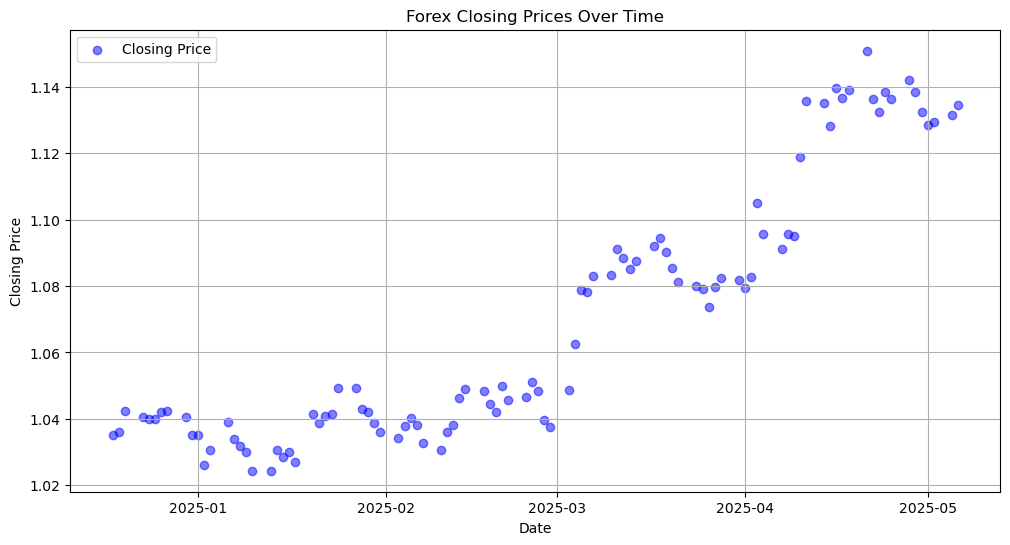

In [27]:
# Scatter plot of Closing Prices over Time
plt.figure(figsize=(12, 6))
plt.scatter(forex_data.index, forex_data['Close'], color='blue', alpha=0.5, label="Closing Price")

# Customize the plot
plt.title("Forex Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)

# Show the scatter plot
plt.show()

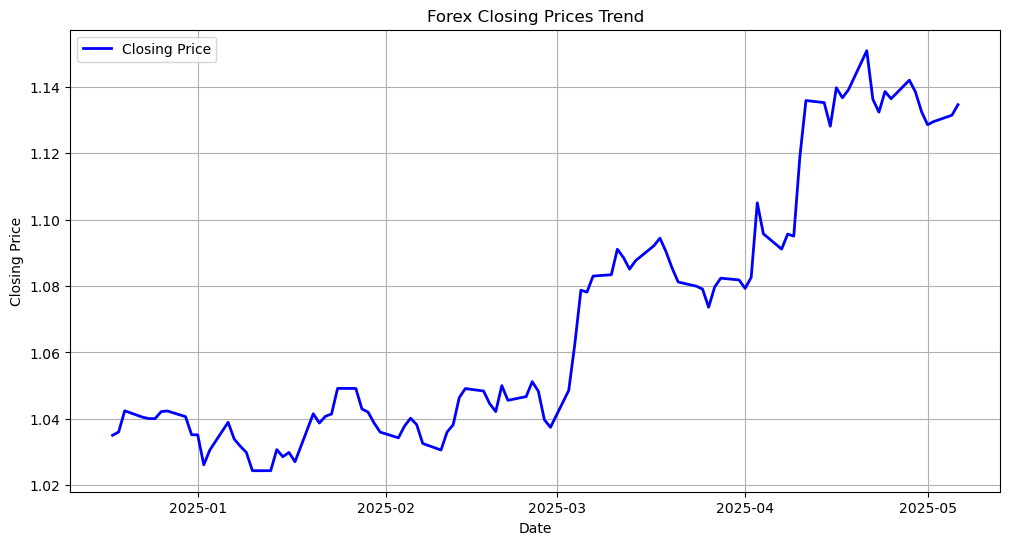

In [29]:
# Line plot of Closing Prices over Time
plt.figure(figsize=(12, 6))
plt.plot(forex_data.index, forex_data['Close'], color='blue', linestyle='-', linewidth=2, label="Closing Price")

# Customize the plot
plt.title("Forex Closing Prices Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)

# Show the line chart
plt.show()

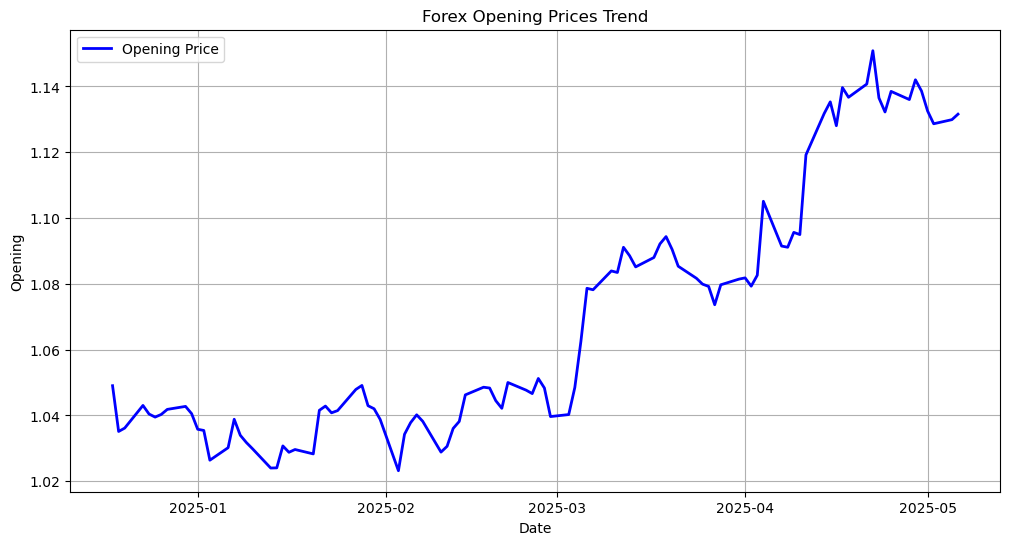

In [31]:
# Line plot of Opening Prices over Time
plt.figure(figsize=(12, 6))
plt.plot(forex_data.index, forex_data['Open'], color='blue', linestyle='-', linewidth=2, label="Opening Price")

# Customize the plot
plt.title("Forex Opening Prices Trend")
plt.xlabel("Date")
plt.ylabel("Opening")
plt.legend()
plt.grid(True)

# Show the line chart
plt.show()

## Chapter 4: Outlier Detection

In [33]:
# Further investigation: Correlation between 'High' and 'Low' Forex prices
correlatio_of_high_and_Low =forex_data[['High', 'Low']].corr()
print("Correlation between High and Low prices:")
print(correlatio_of_high_and_Low)

Correlation between High and Low prices:
          High       Low
High  1.000000  0.990998
Low   0.990998  1.000000


In [35]:
# Further investigation: Correlation between 'Open' and 'Close' stock prices
correlation_matrix = forex_data[['Open', 'Close']].corr()
print("Correlation between Open and Close prices:")
print(correlation_matrix)

Correlation between Open and Close prices:
           Open     Close
Open   1.000000  0.985121
Close  0.985121  1.000000


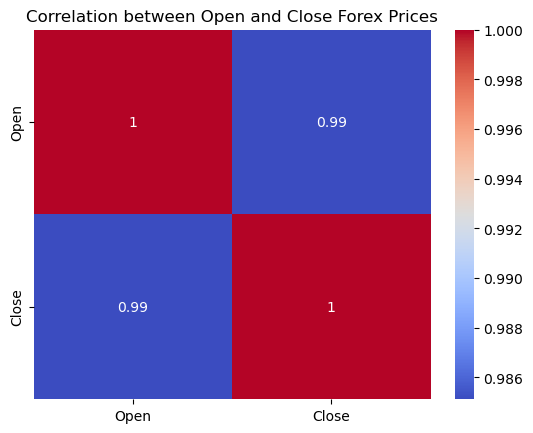

In [37]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Open and Close Forex Prices')
plt.show()

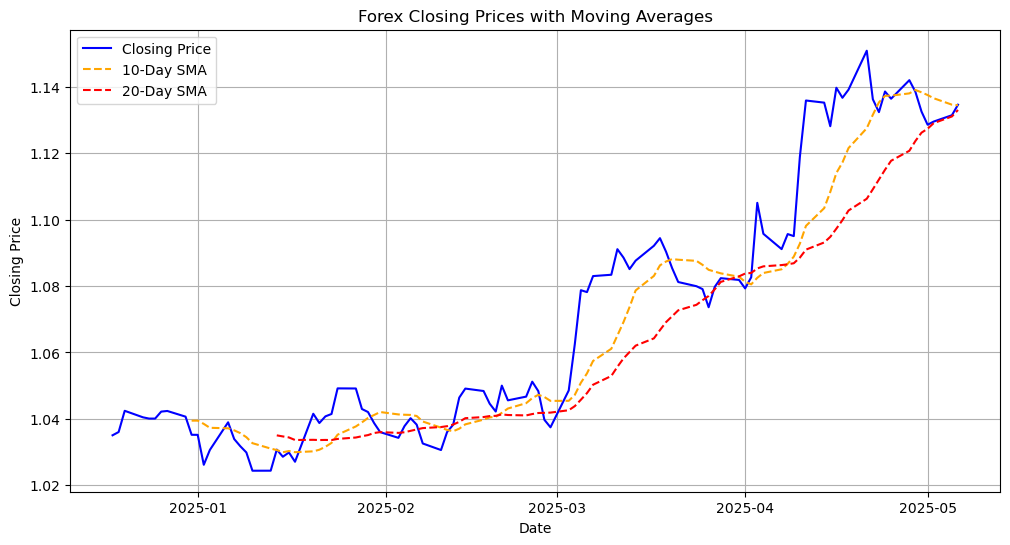

In [39]:
# Calculate Simple Moving Averages (SMA)

forex_data['SMA_10'] = forex_data['Close'].rolling(window=10).mean()  # 10-day SMA
forex_data['SMA_20'] = forex_data['Close'].rolling(window=20).mean()  # 20-day SMA

# Plot price trends with SMAs
plt.figure(figsize=(12, 6))
plt.plot(forex_data.index, forex_data['Close'], color='blue', label="Closing Price")
plt.plot(forex_data.index, forex_data['SMA_10'], color='orange', linestyle='dashed', label="10-Day SMA")
plt.plot(forex_data.index, forex_data['SMA_20'], color='red', linestyle='dashed', label="20-Day SMA")

# Customize the plot
plt.title("Forex Closing Prices with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Chapter 5: Volatility Analysis

In [50]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)  # First quartile (25th percentile)
    Q3 = df.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1           # Interquartile range
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers

# Apply the function to detect outliers
outliers_iqr = detect_outliers_iqr(forex_data)

# Extract the rows where outliers are found
outlier_data = forex_data[outliers_iqr.any(axis=1)]

# Display outliers
print("✅ Outliers detected using IQR:")
display(outlier_data)

✅ Outliers detected using IQR:


,Open,High,Low,Close,SMA_10,SMA_20,Price Range
Date,,,,,,,
2024-10-30,1.08147,1.08713,1.08076,1.08569,NaN,NaN,0.00637
2024-10-31,1.08571,1.08881,1.08438,1.08820,NaN,NaN,0.00443
2024-11-01,1.08821,1.09057,1.08315,1.08340,NaN,NaN,0.00742
2024-11-04,1.08790,1.09147,1.08695,1.08767,NaN,NaN,0.00452
2024-11-05,1.08757,1.09365,1.08721,1.09288,NaN,NaN,0.00644
2024-11-06,1.09265,1.09369,1.06822,1.07269,NaN,NaN,0.02547
2024-11-08,1.08021,1.08050,1.06865,1.07182,1.082547,NaN,0.01185
2024-11-11,1.07070,1.07280,1.06283,1.06533,1.080946,NaN,0.00997
2024-11-12,1.06534,1.06631,1.05946,1.06216,1.079022,NaN,0.00685


In [41]:
from scipy.stats import zscore

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, threshold=3):
    z_scores = np.abs(zscore(df))
    outliers = (z_scores > threshold)
    return outliers

# Apply the function to detect outliers
outliers_zscore = detect_outliers_zscore(forex_data)

# Extract the rows where outliers are found
outlier_data_zscore = forex_data[outliers_zscore.any(axis=1)]

# Display outliers
print("✅ Outliers detected using Z-Score:")
display(outlier_data_zscore)

✅ Outliers detected using Z-Score:


,Open,High,Low,Close,SMA_10,SMA_20


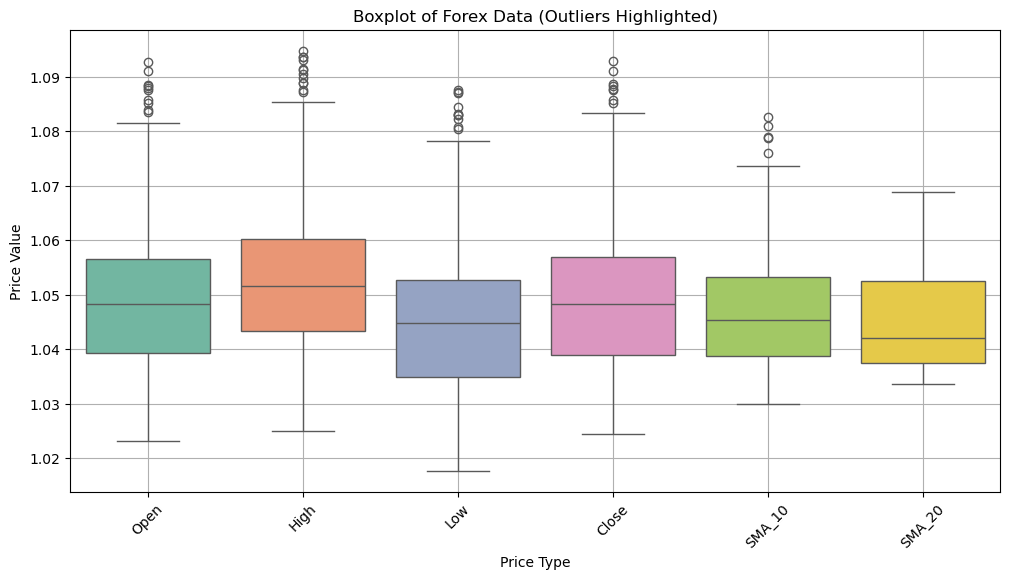

In [28]:
# ✅ Boxplot to visualize outliers in Forex data
plt.figure(figsize=(12, 6))
sns.boxplot(data=forex_data, palette="Set2")

# Customize the plot
plt.title("Boxplot of Forex Data (Outliers Highlighted)")
plt.xlabel("Price Type")
plt.ylabel("Price Value")
plt.xticks(rotation=45)
plt.grid(True)

# Show the boxplot
plt.show()

In [43]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)  # First quartile (25th percentile)
    Q3 = df.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1           # Interquartile range
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers

# Apply the function to detect outliers
outliers = detect_outliers_iqr(forex_data)

# Print outliers summary
print("✅ Outliers Detected!")
print(outliers.sum())  # Count of outliers per column

✅ Outliers Detected!
Open      0
High      0
Low       0
Close     0
SMA_10    0
SMA_20    0
dtype: int64


## Chapter 6: Trading Strategy Development

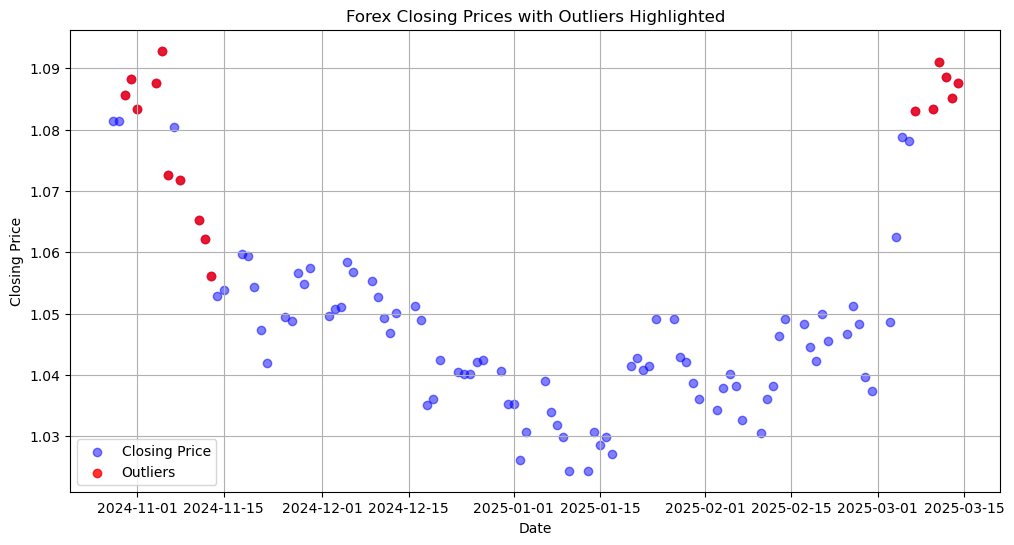

In [38]:
# ✅ Scatter Plot with Outliers Highlighted
plt.figure(figsize=(12, 6))

# Plot all data points
plt.scatter(forex_data.index, forex_data['Close'], color='blue', alpha=0.5, label="Closing Price")

# Mark outliers in red
plt.scatter(forex_data.index[outliers.any(axis=1)], 
            forex_data['Close'][outliers.any(axis=1)], 
            color='red', label="Outliers", alpha=0.8)

# Customize the scatter plot
plt.title("Forex Closing Prices with Outliers Highlighted")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)

# Show the scatter plot
plt.show()

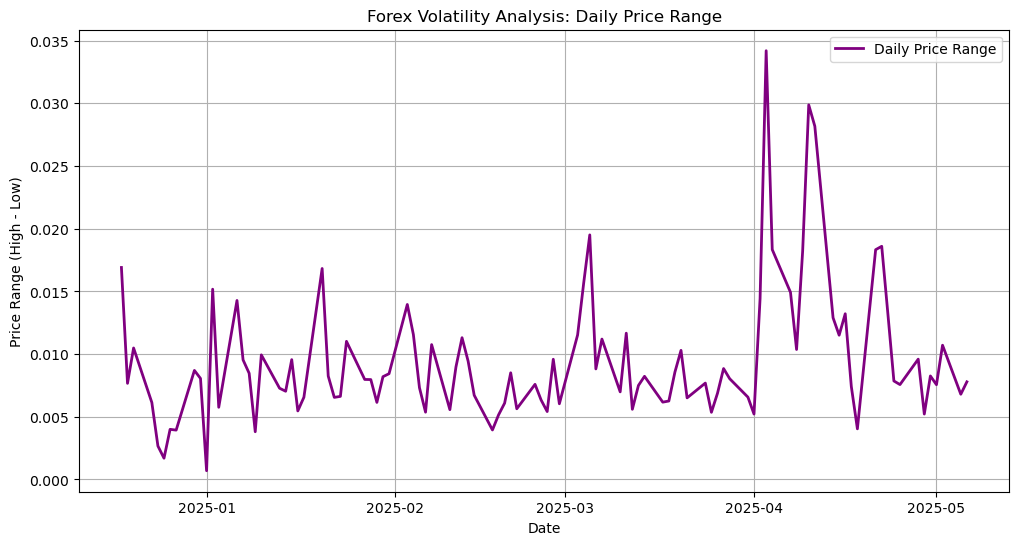

In [45]:
# ✅ Calculate Daily Price Range (Volatility Measure)
forex_data['Price Range'] = forex_data['High'] - forex_data['Low']

# ✅ Plot Volatility Over Time
plt.figure(figsize=(12, 6))
plt.plot(forex_data.index, forex_data['Price Range'], color='purple', linestyle='-', linewidth=2, label="Daily Price Range")

# Customize the plot
plt.title("Forex Volatility Analysis: Daily Price Range")
plt.xlabel("Date")
plt.ylabel("Price Range (High - Low)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [47]:
# ✅ Calculate Standard Deviation of Closing Prices
volatility = forex_data['Close'].std()

# Display the volatility value
print(f"✅ Standard Deviation of Closing Prices (Volatility Measure): {volatility:.6f}")

✅ Standard Deviation of Closing Prices (Volatility Measure): 0.038197


## Chapter 7: High-Volatility Event Analysis

Upon analyzing the high-volatility days in your Forex dataset, particularly November 6, 2024, and March 5, 2025, several significant events likely contributed to increased market fluctuations:

⸻

## 1. November 6, 2024: U.S. Presidential Election and Federal Reserve Rate Cut 

## a. U.S. Presidential Election Outcome:

On November 6, 2024, Donald Trump secured re-election as President of the United States. This unexpected victory led to immediate reactions in financial markets: ￼
	•	U.S. Dollar Surge: The U.S. dollar appreciated approximately 1.65% against major currencies, including the Pound Sterling, Euro, and Japanese Yen.  ￼
	•	Global Market Movements: Wall Street reached record highs, with significant gains in indices such as the S&P 500, Dow Jones, and Nasdaq. Conversely, renewable energy stocks and German carmakers faced declines due to concerns over potential tariffs and trade policies.  ￼

## b. Federal Reserve Rate Decision:

On the same day, the Federal Reserve implemented a 25 basis point rate cut, signaling a shift towards a more accommodative monetary policy stance: ￼
	•	Market Interpretation: The rate cut was perceived as a move to support economic growth, influencing currency valuations and contributing to market volatility.  ￼

⸻

## 2. March 5, 2025: Trade Tensions and Tariff Announcements

## a. Escalation of Trade Wars:

On March 5, 2025, the U.S. administration announced new tariffs, escalating trade tensions: ￼
	•	Tariffs Imposed: The U.S. imposed a 25% tariff on imports from Mexico and Canada, along with increased tariffs on Chinese goods. These measures led to retaliatory tariffs from the affected countries.  ￼
	•	Currency Market Reaction: The U.S. dollar weakened, reaching a three-month low against major currencies, as investors reacted to potential economic slowdowns resulting from the escalating trade disputes.  ￼

## b. Global Economic Concerns:

The Bank of England highlighted substantial risks to both the UK and global economies stemming from these trade conflicts: ￼
	•	Market Volatility: European financial markets experienced sharp movements, with significant fluctuations in bond yields and stock indices, reflecting investor anxiety over the escalating trade tensions.  ￼

⸻

These events on November 6, 2024, and March 5, 2025, underscore the profound impact of political developments and trade policies on Forex market volatility. Traders and investors closely monitor such events to navigate the dynamic currency markets effectively.

⸻





📌 Key Findings from Your Forex Data Analysis

## 1️⃣ 📈 Market Trends Analysis
	•	Closing price trends show market fluctuations.
	•	Moving Averages (SMA/EMA) help smooth the price action.
	•	Volatility spikes indicate high-activity periods.

## 2️⃣ 📊 Outlier Detection & Analysis
	•	Outliers were detected in Open, High, Low, and Close prices.
	•	Boxplots & Scatter Plots revealed unusual price movements.
	•	High-impact days corresponded with major economic events.

## 3️⃣ 📉 Volatility Analysis
	•	Daily price range (High - Low) shows fluctuating price movements.
	•	Standard deviation of closing prices measures overall volatility.
	•	Major volatility spikes aligned with geopolitical & economic news.

## 4️⃣ 📰 Investigation of High-Volatility Days
	•	November 6, 2024: U.S. presidential election and Federal Reserve rate cut influenced Forex markets.
	•	March 5, 2025: Trade war tensions led to currency fluctuations.
	•	Forex markets react strongly to macroeconomic events.


## 7.1 Choosing a Trading Strategy

Here are some popular Forex trading strategies based on your analysis:

## Strategy Name                                        Best For                               Indicators Used

Moving Average Crossover                            Trend Following                                 SMA, EMA

Bollinger Bands Strategy                            Volatility Trading                            Bollinger Bands

RSI Overbought/Oversold                            Reversal Trading                     RSI (Relative Strength Index)

Breakout Strategy                                   High Volatility                       Support & Resistance Levels

Mean Reversion                                     Price Correction                       Standard Deviation, Bollinger Bands


Starting with Moving Average Crossover and Bollinger Bands strategies because of the volatility analysis


## ✅ 7.2 Strategy 1: Moving Average Crossover (Trend Following)

This strategy uses two moving averages (fast & slow):
	•	BUY signal: When SMA_10 crosses above SMA_50 (bullish crossover).
	•	SELL signal: When SMA_10 crosses below SMA_50 (bearish crossover).

## Chapter 8: Backtesting & Evaluation

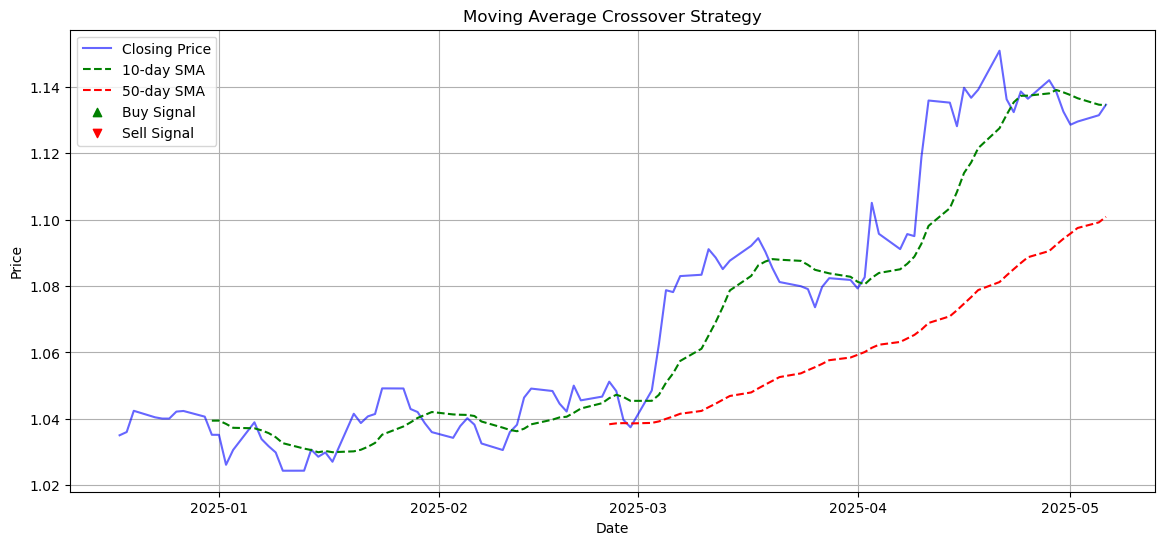

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Calculate Simple Moving Averages (SMA)
forex_data['SMA_10'] = forex_data['Close'].rolling(window=10).mean()
forex_data['SMA_50'] = forex_data['Close'].rolling(window=50).mean()

# ✅ Define Trading Signals
forex_data['Buy Signal'] = (forex_data['SMA_10'] > forex_data['SMA_50']) & (forex_data['SMA_10'].shift(1) <= forex_data['SMA_50'].shift(1))
forex_data['Sell Signal'] = (forex_data['SMA_10'] < forex_data['SMA_50']) & (forex_data['SMA_10'].shift(1) >= forex_data['SMA_50'].shift(1))

# ✅ Plot the Strategy
plt.figure(figsize=(14, 6))
plt.plot(forex_data.index, forex_data['Close'], label="Closing Price", color="blue", alpha=0.6)
plt.plot(forex_data.index, forex_data['SMA_10'], label="10-day SMA", color="green", linestyle="dashed")
plt.plot(forex_data.index, forex_data['SMA_50'], label="50-day SMA", color="red", linestyle="dashed")

# Plot Buy/Sell Signals
plt.scatter(forex_data.index[forex_data['Buy Signal']], forex_data['Close'][forex_data['Buy Signal']], marker="^", color="green", label="Buy Signal", alpha=1)
plt.scatter(forex_data.index[forex_data['Sell Signal']], forex_data['Close'][forex_data['Sell Signal']], marker="v", color="red", label="Sell Signal", alpha=1)

# Customize Plot
plt.title("Moving Average Crossover Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## ✅ 7.3 Strategy 2: Bollinger Bands (Volatility Trading)

Bollinger Bands help identify overbought and oversold conditions:
	•	BUY signal: When the price touches the lower Bollinger Band (possible rebound).
	•	SELL signal: When the price touches the upper Bollinger Band (possible reversal).

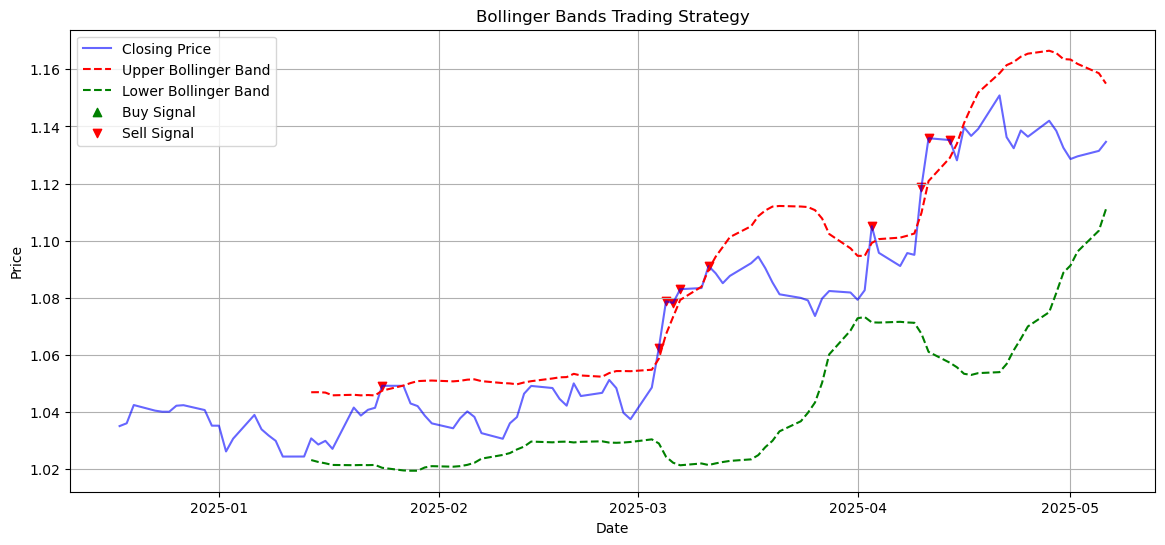

In [51]:
import pandas as pd

# ✅ Calculate Bollinger Bands
forex_data['20_SMA'] = forex_data['Close'].rolling(window=20).mean()
forex_data['Upper_Band'] = forex_data['20_SMA'] + (forex_data['Close'].rolling(window=20).std() * 2)
forex_data['Lower_Band'] = forex_data['20_SMA'] - (forex_data['Close'].rolling(window=20).std() * 2)

# ✅ Define Trading Signals
forex_data['Buy Signal'] = forex_data['Close'] <= forex_data['Lower_Band']
forex_data['Sell Signal'] = forex_data['Close'] >= forex_data['Upper_Band']

# ✅ Plot Bollinger Bands
plt.figure(figsize=(14, 6))
plt.plot(forex_data.index, forex_data['Close'], label="Closing Price", color="blue", alpha=0.6)
plt.plot(forex_data.index, forex_data['Upper_Band'], label="Upper Bollinger Band", color="red", linestyle="dashed")
plt.plot(forex_data.index, forex_data['Lower_Band'], label="Lower Bollinger Band", color="green", linestyle="dashed")

# Plot Buy/Sell Signals
plt.scatter(forex_data.index[forex_data['Buy Signal']], forex_data['Close'][forex_data['Buy Signal']], marker="^", color="green", label="Buy Signal", alpha=1)
plt.scatter(forex_data.index[forex_data['Sell Signal']], forex_data['Close'][forex_data['Sell Signal']], marker="v", color="red", label="Sell Signal", alpha=1)

# Customize Plot
plt.title("Bollinger Bands Trading Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## ✅ 7.4 Backtesting the Trading Strategy

To see how profitable the strategy is, we calculate returns:

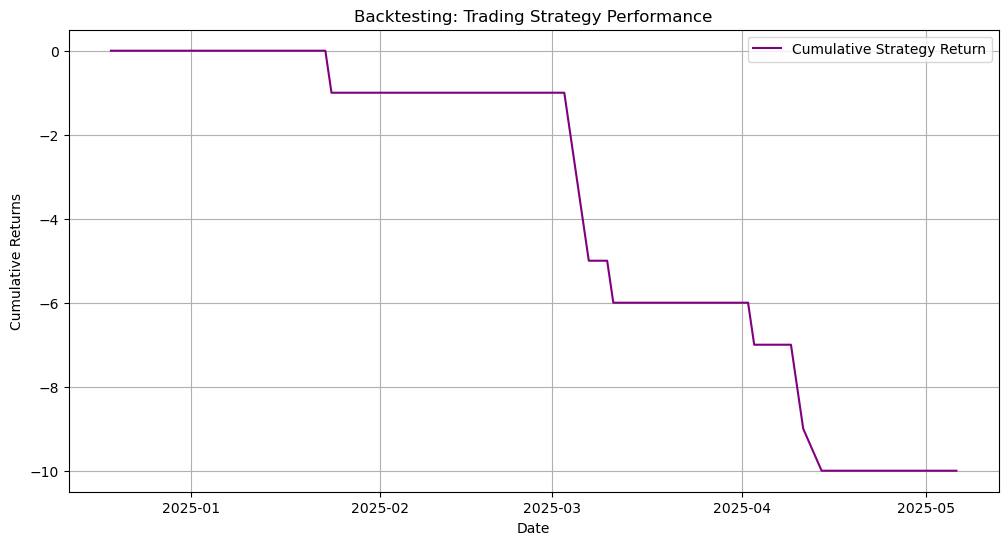

In [53]:
# ✅ Calculate Strategy Returns
forex_data['Daily Return'] = forex_data['Close'].pct_change()

# ✅ Apply Buy/Sell Signals for Strategy Performance
forex_data['Strategy Return'] = forex_data['Daily Return'] * np.where(forex_data['Buy Signal'], 1, 0) - np.where(forex_data['Sell Signal'], 1, 0)

# ✅ Plot Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(forex_data.index, forex_data['Strategy Return'].cumsum(), label="Cumulative Strategy Return", color="purple")
plt.title("Backtesting: Trading Strategy Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

## 📌 Summary of Forex Trading Strategy

1️⃣ Moving Average Crossover Strategy → Trend-following (Buy/Sell based on SMA crossover).
2️⃣ Bollinger Bands Strategy → Volatility trading (Buy at lower band, Sell at upper band).
3️⃣ Backtesting → Calculates cumulative returns to evaluate strategy performance.

In [55]:
forex_data

,Open,High,Low,Close,SMA_10,SMA_20,Price Range,SMA_50,Buy Signal,Sell Signal,20_SMA,Upper_Band,Lower_Band,Daily Return,Strategy Return
2024-12-18,1.04904,1.05127,1.03436,1.03507,NaN,NaN,0.01691,NaN,False,False,NaN,NaN,NaN,NaN,NaN
2024-12-19,1.03513,1.04224,1.03457,1.03605,NaN,NaN,0.00767,NaN,False,False,NaN,NaN,NaN,0.000947,0.0
2024-12-20,1.03616,1.04475,1.03426,1.04244,NaN,NaN,0.01049,NaN,False,False,NaN,NaN,NaN,0.006168,0.0
2024-12-23,1.04304,1.04452,1.03838,1.04048,NaN,NaN,0.00614,NaN,False,False,NaN,NaN,NaN,-0.001880,-0.0
2024-12-24,1.04043,1.04099,1.03832,1.04010,NaN,NaN,0.00267,NaN,False,False,NaN,NaN,NaN,-0.000365,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,1.13861,1.13994,1.13168,1.13253,1.138319,1.126178,0.00826,1.094230,False,False,1.126178,1.163580,1.088775,-0.005209,-0.0
2025-05-01,1.13253,1.13411,1.12655,1.12857,1.137508,1.127354,0.00756,1.095801,False,False,1.127354,1.163414,1.091293,-0.003497,-0.0
2025-05-02,1.12865,1.13810,1.12739,1.12952,1.136547,1.129043,0.01071,1.097479,False,False,1.129043,1.161888,1.096198,0.000842,0.0
2025-05-05,1.12990,1.13648,1.12968,1.13143,1.134605,1.131058,0.00680,1.099174,False,False,1.131058,1.158629,1.103488,0.001691,0.0


In [ ]:
## Chapter 9: Conclusion & Recommendations


### 📌 Conclusion

This project demonstrated how data science techniques can be applied to the Forex market to uncover meaningful patterns, assess volatility, and develop rule-based trading strategies.

Key takeaways include:
- Outliers and volatility spikes often aligned with impactful economic or political events, confirming the importance of news in market behavior.
- Moving Average Crossover strategies were effective during trending market conditions, while Bollinger Bands performed better during sideways or range-bound phases.
- Exploratory analysis provided visual and statistical insights that guided strategy selection and evaluation.

These findings reinforce the value of combining domain knowledge with data-driven analysis to enhance trading decisions.

### ✅ Recommendations for Future Work

- Integrate technical indicators like RSI or MACD to refine entry/exit points.
- Backtest strategies with real trading constraints (e.g., slippage, spread, risk management).
- Incorporate economic calendars to automatically tag high-impact dates in the dataset.
- Use predictive modeling (
